# <center>Data Science in Soccer </center>
### <center>Michael Lucio</center>
### <center>4/24/2024</center>

# Import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from statsbombpy import sb                  # allows for easy access to statsbomb data
from mplsoccer import VerticalPitch, Pitch  # allows for easy pitch visualizations

# from kloppy import metrica

import warnings
warnings.filterwarnings('ignore')

# Event Data

### Load Data
We will load in Event Data from Statsbomb using `statsbombpy`

In [39]:
comps = sb.competitions()
print(comps.info())
comps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             71 non-null     int64 
 1   season_id                  71 non-null     int64 
 2   country_name               71 non-null     object
 3   competition_name           71 non-null     object
 4   competition_gender         71 non-null     object
 5   competition_youth          71 non-null     bool  
 6   competition_international  71 non-null     bool  
 7   season_name                71 non-null     object
 8   match_updated              71 non-null     object
 9   match_updated_360          54 non-null     object
 10  match_available_360        8 non-null      object
 11  match_available            71 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.8+ KB
None


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


We will choose to analyze LAFC vs Inter Miami 9/3/23 `match_id = 3877090`

In [42]:
match_id = 3877090
events = sb.events(match_id = match_id)
lineups = sb.lineups(match_id = match_id)

In [46]:
events

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",LAFC,919,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",Inter Miami,1975,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LAFC,919,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Inter Miami,1975,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LAFC,919,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Inter Miami,1975,00:10:14.818,Referee Ball-Drop,NaN
3391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Inter Miami,1975,00:10:29.437,Shield,NaN
3392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LAFC,919,00:37:12.527,Error,NaN
3393,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Inter Miami,1975,00:40:36.091,Bad Behaviour,NaN


In [52]:
# Split the data into two teams
team1 = events[events.team == 'LAFC']
team2 = events[events.team == 'Inter Miami']

# Set a couple of constants for the colors
LAFC_COLOR = '#f5e342'
MIAMI_COLOR = '#f542d1'
LAFC_TEAM_ID = 919
MIAMI_TEAM_ID = 1975

### Basic Visualizations

#### Shotmap Function

In [67]:
def create_shotmap(team, ax):
    pitch = VerticalPitch(pitch_type='statsbomb', half=True)
    pitch.draw(ax=ax)
    
    # the shots data is in the 'type' column
    team = team[team['type']=='Shot']
    
    # Filter down to just the columns we need
    team = team[['team', 'player', 'location', 'shot_outcome', 'shot_statsbomb_xg', 'shot_type']]
    team[['x', 'y']] = team['location'].apply(pd.Series)
    
    # Draw the shotmap
    for x in team.to_dict(orient='records'):
    
        pitch.scatter(
            x=x['x'], y=x['y'], ax=ax, 
            s=500 * x['shot_statsbomb_xg'], 
            color='green' if x['shot_outcome'] == 'Goal' else 'white', 
            edgecolors='black', alpha=0.7
        )

#### Pass Network Function

In [85]:
import math
def create_passnetwork(team, ax):
    team[['x', 'y']] = team['location'].apply(pd.Series)
    
    tactics = team[~team['tactics'].isnull()][['tactics', 'team']]

    all_jersey_numbers = []
    for y in tactics.to_dict(orient='records'):
        all_jersey_numbers.append(pd.DataFrame([{'player_id': x['player']['id'], 'jersey_number': x['jersey_number']} for x in y['tactics']['lineup']]))
        
    jersey_numbers = pd.concat(all_jersey_numbers).drop_duplicates()
    
    # Make a new, single column for time and sort the events in chronological order
    team["newsecond"] = 60 * team["minute"] + team["second"]
    
    team.sort_values(by=['newsecond'])
    
    # identify the passer and then the recipient, who'll be the playerId of the next action
    team['passer'] = team['player_id']
    
    team['recipient'] = team['passer'].shift(-1)
    
    # filter for only passes and then successful passes
    passes_df = team.loc[(team['type']=="Pass")]
    passes_df['pass_outcome'] = passes_df['pass_outcome'].fillna("Successful")
    
    completions = passes_df.loc[(passes_df['pass_outcome'] == "Successful")]
    
    #find time of the team's first substitution and filter the df to only passes before that
    sub_df = team.loc[(team['type'] == "Substitution")]
    first_sub = sub_df["newsecond"].min()
    
    if first_sub <= (60 * 45):
        first_sub = 60 * 45
    
    completions = completions.loc[completions['newsecond'] < first_sub]
    
    # Find Average Locations
    average_locs_and_count = completions.groupby('passer').agg({'x': ['mean'], 'y': ['mean','count']})
    average_locs_and_count.columns = ['x', 'y', 'count']
    
    # find number of passes along each 'path' of passer to recipient
    passes_between = completions.groupby(['passer', 'recipient']).id.count().reset_index()
    passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)
    
    passes_between = passes_between.merge(average_locs_and_count, left_on='passer', right_index=True)
    passes_between = passes_between.merge(
        average_locs_and_count, left_on='recipient', right_index=True, suffixes=['', '_end']
    )
    
    # set minimum threshold for pass arrows to be plotted. So this will only plot combos which occured at least 5 times.
    passes_between = passes_between.loc[(passes_between['pass_count'] >= 4)]
    
    # plot arrows
    def pass_line_template(ax, x, y, end_x, end_y, line_color):
        ax.annotate(
            '',
            xy=(end_y,  end_x),
            xytext=(y, x),
            zorder=1,
            arrowprops=dict(arrowstyle='-|>', linewidth=4, color=line_color, alpha=.85)
        )
        
    def pass_line_template_shrink(ax, x, y, end_x, end_y, line_color, dist_delta=1.2):
        dist = math.hypot(end_x - x, end_y - y)
        angle = math.atan2(end_y-y, end_x-x)
        upd_x = x + (dist - dist_delta) * math.cos(angle)
        upd_y = y + (dist - dist_delta) * math.sin(angle)
        pass_line_template(ax, x, y, upd_x, upd_y, line_color=line_color)
    
    pitch = VerticalPitch(pitch_type='statsbomb')
    pitch.draw(ax=ax)
    
    for index, row in passes_between.iterrows():
        pass_line_template_shrink(ax, row['x'], row['y'], row['x_end'], row['y_end'], 'black')
    
    # plot nodes
    pitch.scatter(
        average_locs_and_count.x, average_locs_and_count.y, s=500,
        color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2
    )
    
    for index, row in average_locs_and_count.iterrows():
        pitch.annotate(
            jersey_numbers[jersey_numbers['player_id'] == row.name]['jersey_number'].values[0],
            xy=(row.x, row.y),
            c='#132743',
            va='center',
            ha='center',
            size=10,
            fontweight='bold',
            ax=ax
        )

#### Summary Table Function

In [73]:
def create_table(team1, team2):
    # Drop rows where the pass_outcome is Unknown
    team1 = team1[team1['pass_outcome'] != 'Unknown']
    team2 = team2[team2['pass_outcome'] != 'Unknown']
    
    # Create a table with the data
    # We first need to calculate the statistics for each team
    # we will calcualte the following stats:
    # - goals
    # - xG
    # - shots
    # - shots on target
    # - passes
    # - pass completion %
    
    # Create a dictionary to store the stats
    stats = {
        'goals': {'team1': len(team1[team1['type'] == 'Goal']), 'team2': len(team2[team2['type'] == 'Goal'])},
        'xG': {'team1': round(team1['shot_statsbomb_xg'].sum(), 2), 'team2': round(team2['shot_statsbomb_xg'].sum(), 2)},
        'shots': {'team1': len(team1[team1['type'] == 'Shot']), 'team2': len(team2[team2['type'] == 'Shot'])},
        'shots_on_target': {
            'team1': len(team1[(team1['type'] == 'Shot') & (team1['shot_end_location'].str.len() > 2) & (team1['shot_outcome'] != 'Off T')]), 
            'team2': len(team2[(team2['type'] == 'Shot') & (team2['shot_end_location'].str.len() > 2) & (team2['shot_outcome'] != 'Off T')])
        },
        'passes': {'team1': len(team1[team1['type'] == 'Pass']), 'team2': len(team2[team2['type'] == 'Pass'])},
        'pass_completion': {
            'team1': round(len(team1[(team1['type'] == 'Pass') & (team1['pass_outcome'].isna())]) / len(team1[team1['type'] == 'Pass']) * 100, 2) ,
            'team2': round(len(team2[(team2['type'] == 'Pass') & (team2['pass_outcome'].isna())]) / len(team2[team2['type'] == 'Pass']) * 100, 2)
        }
    }
    
    # store as a dataframe
    stats_df = pd.DataFrame(stats).T

    column_labels = ['', '', '']
    table_vals = [
        [str(stats_df['team1']['xG']), 'xG', str(stats_df['team2']['xG'])],
        [str(stats_df['team1']['shots']), 'Shots', str(stats_df['team2']['shots'])],
        [str(stats_df['team1']['shots_on_target']), 'Shots on Target', str(stats_df['team2']['shots_on_target'])],
        [str(stats_df['team1']['passes']), 'Passes', str(stats_df['team2']['passes'])],
        [str(stats_df['team1']['pass_completion']), 'Pass Completion %', str(stats_df['team2']['pass_completion'])]
    ]
    
    return column_labels, table_vals

#### xG Function

In [77]:
def create_xg_flow_chart(df, ax):
    # We'll use the original df instead of the team1 and team2 dataframes
    
    # Filter the columns to only shots
    df = events[events['type'] == 'Shot']
    
    # Sort the values so they are in order of time
    df = df.sort_values(by="index")
    
    # Calculate the cumulative xG for each team
    df['cumulative_xG'] = df.groupby('team_id')['shot_statsbomb_xg'].cumsum()
    
    # Plot the xG for each team by half
    # We want to make it so the lines both start at 0
    for team in df['team_id'].unique():
        
        team_df = df[df['team_id'] == team]
        
        # add a 0 xG row at the start of the match
        team_df = pd.concat([pd.DataFrame({
            'team_id': team, 'minute': 0, 'shot_statsbomb_xg': 0, 'shot_outcome': None, 'cumulative_xG': 0, 'period': 1
        }, index=[0]), team_df])
        
        ax.plot(
            team_df['minute'], 
            team_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=LAFC_COLOR if team == LAFC_TEAM_ID else MIAMI_COLOR
        )   
            
    
    # We Can add a scatter plot to show the goals
    for team in df['team_id'].unique():
        team_df = df[(df['team_id'] == team) & (df['shot_outcome'] == 'Goal')].to_dict(orient='records')
        for x in team_df:
            ax.scatter(
                x['minute'], 
                x['cumulative_xG'], 
                c='white',
                edgecolor=LAFC_COLOR if team == LAFC_TEAM_ID else MIAMI_COLOR,
                s=100,
                # We want the goals to be on top of the lines
                zorder=5
            )
            
            # add a label to the goals for the player who scored
            ax.text(
                x['minute'], 
                x['cumulative_xG'] - .07, 
                x['player'], 
                ha='center', 
                va='center', 
                fontfamily='monospace', 
                fontsize=8,
                zorder=10
            )
            
    # Let's label the x axis with first and second half
    ax.set_xticks([0, 45, 90, 120])
    ax.set_xticklabels(['0\'', '45\'', '90\'', '120\''])
    
    # Let's get rid of the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

#### Final Dashboard

(-4.0, 84.0, 56.0, 124.0)

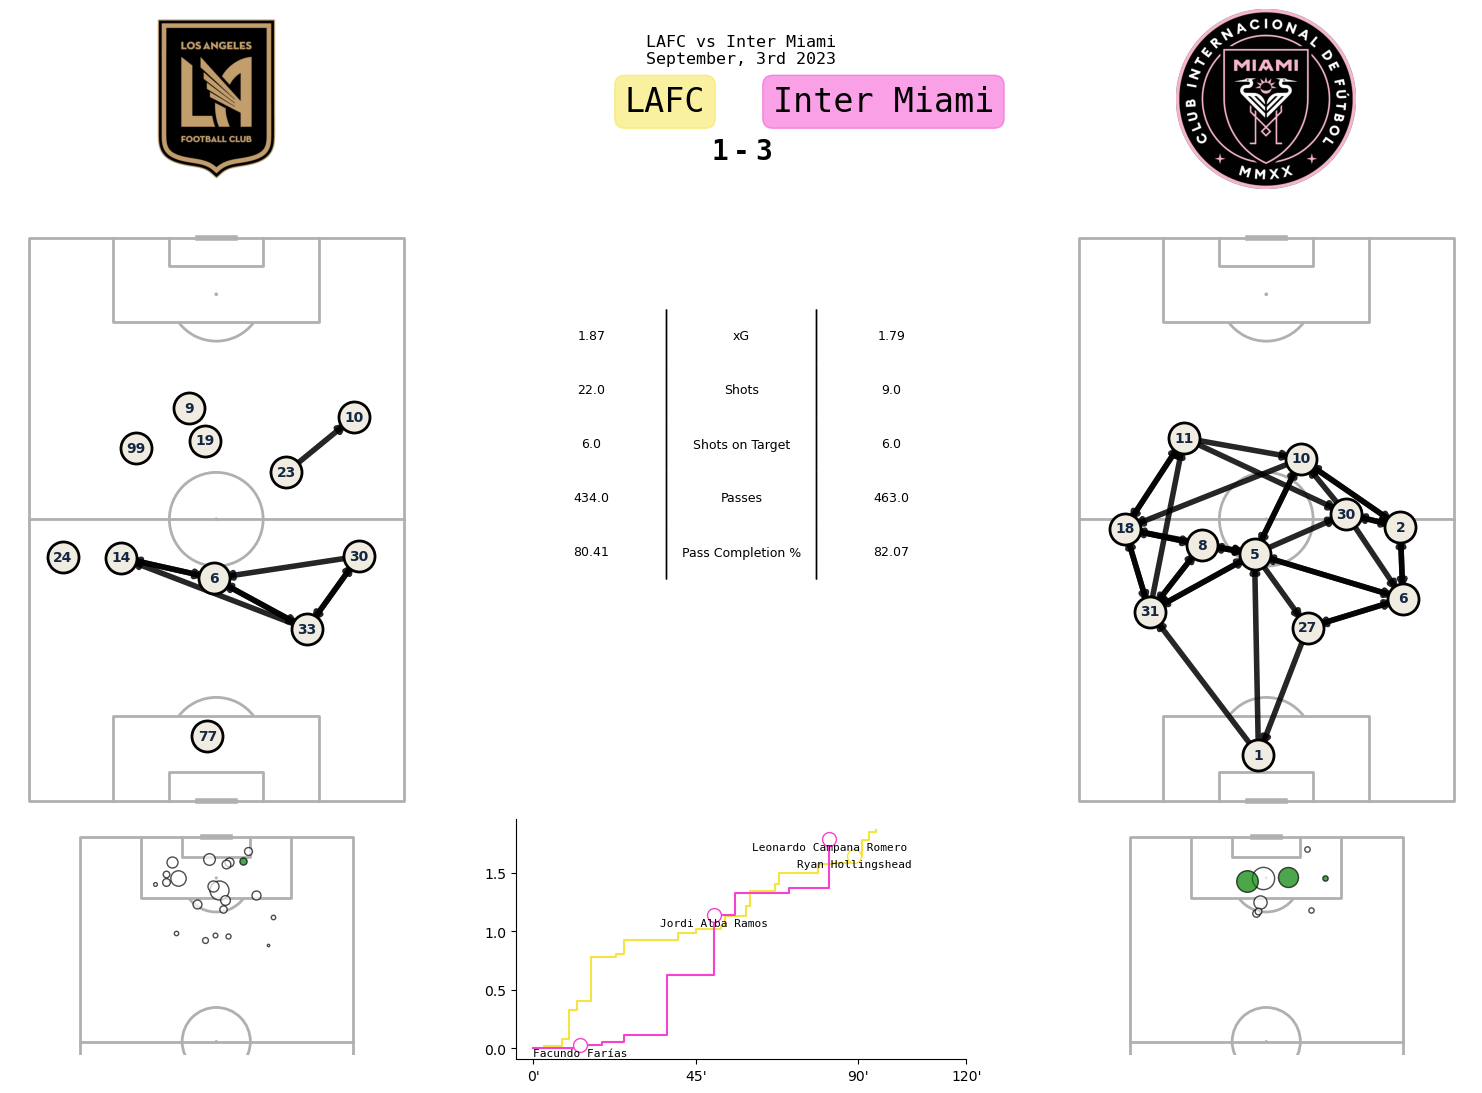

In [90]:
# Set up the figure and grid layout
fig = plt.figure(figsize=(15, 12))

# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0.225, 0.775, 0.15, 0.15])

# get the image from the team_logos folder
team1_img = Image.open('lafc_logo.png')
ax1.imshow(team1_img)
ax1.axis('off')

ax2 = fig.add_axes([0.5, 0.8, 0.3, 0.1])
ax2.text(0.5, 0.8, 'LAFC vs Inter Miami\nSeptember, 3rd 2023', fontsize=12, ha='center', fontdict={'family': 'monospace'})

team_1_text = ax2.text(0.42, .4, 'LAFC', fontsize=24, ha='right', fontdict={'family': 'monospace'})
team_1_text.set_bbox(dict(facecolor= LAFC_COLOR, alpha=0.5, edgecolor=LAFC_COLOR, boxstyle='round'))


team_2_text = ax2.text(0.57, .4, 'Inter Miami', fontsize=24, ha='left', fontdict={'family': 'monospace'})
team_2_text.set_bbox(dict(facecolor=MIAMI_COLOR, alpha=0.5, edgecolor=MIAMI_COLOR, boxstyle='round'))

ax2.text(0.47, 0, '1', fontsize=20, ha='right', fontdict={'family': 'monospace', 'weight': 'bold'})
ax2.text(0.5, 0, '-', fontsize=20, ha='center', fontdict={'family': 'monospace', 'weight': 'bold'})
ax2.text(0.53, 0, '3', fontsize=20, ha='left', fontdict={'family': 'monospace', 'weight': 'bold'})

ax2.axis('off')

ax3 = fig.add_axes([0.925, 0.775, 0.15, 0.15])
# get the image from the team_logos folder
team2_img = Image.open('miami_logo.png')
ax3.imshow(team2_img)
ax3.axis('off')


# ax4 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_axes([0.15, 0.25, 0.3, 0.5])
create_passnetwork(team1, ax4)
ax4.axis('off')

ax5 = fig.add_axes([0.5, 0.2, 0.3, 0.5])
# create a table with data. The middle column will be the statistic with the left and right columns being the stats for each team
column_labels, table_vals = create_table(team1, team2)

table = ax5.table(
    cellText=table_vals, 
    cellLoc='center', 
    edges='vertical',
    bbox=[0, .5, 1, .45],
)

table.set_fontsize(14)

for (i, j), cell in table.get_celld().items():
    if j == 0:
        table.get_celld()[(i, j)].visible_edges = 'R'
    elif j == 2:
        table.get_celld()[(i, j)].visible_edges = 'L'
    else:
        table.get_celld()[(i, j)].visible_edges = 'LR'

ax5.axis('off')

ax6 = fig.add_axes([0.85, 0.25, 0.3, 0.5])
create_passnetwork(team2, ax6)
# ax6.axis('off')

ax7 = fig.add_axes([0.2, 0.05, 0.2, 0.2])
create_shotmap(team1, ax7)
# ax7.axis('off')

ax8 = fig.add_axes([0.5, 0.05, 0.3, 0.2])
create_xg_flow_chart(events, ax8)
# ax8.axis('off')

ax9 = fig.add_axes([0.9, 0.05, 0.2, 0.2])
create_shotmap(team2, ax9)
ax9.axis('off')

# Tracking Data

In [88]:
#Import Tracking Data
tracking_df = pd.read_csv('tracking_data.csv')
tracking_df

,period_id,frame_idx,game_clock,wall_clock,live,last_touch_team_id,team_id,player_id,player_number,speed,x,y,z,ball_x,ball_y,ball_z,ball_speed
0,1,0,0.00,1649524084014,False,6900,1207,41700,3,0.00,-3.73,21.60,0.0,0.41,0.01,0.17,12.9
1,1,0,0.00,1649524084014,False,6900,1207,451375,40,0.00,-5.56,11.40,0.0,0.41,0.01,0.17,12.9
2,1,0,0.00,1649524084014,False,6900,1207,442451,20,0.00,-16.99,-5.24,0.0,0.41,0.01,0.17,12.9
3,1,0,0.00,1649524084014,False,6900,1207,229903,99,0.00,-1.18,-17.13,0.0,0.41,0.01,0.17,12.9
4,1,0,0.00,1649524084014,False,6900,1207,464785,31,0.00,-12.08,-1.23,0.0,0.41,0.01,0.17,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076061,2,143445,2989.84,1649530851934,False,6900,6900,45215,7,1.18,21.40,-2.67,0.0,19.07,-26.96,3.21,5.6
3076062,2,143445,2989.84,1649530851934,False,6900,6900,174577,1,1.30,-34.03,-6.79,0.0,19.07,-26.96,3.21,5.6
3076063,2,143445,2989.84,1649530851934,False,6900,6900,106916,11,0.65,-0.61,-9.99,0.0,19.07,-26.96,3.21,5.6
3076064,2,143445,2989.84,1649530851934,False,6900,6900,177947,13,1.90,19.03,-28.29,0.0,19.07,-26.96,3.21,5.6


### Example Project
For the project, you will be assuming the role of Data Analyst at an MLS club. You've been tasked with sending your supervisor a CSV containing a **timestamped** list of **Fullback Overlaps** from your last match. 

**Fullback Overlap Definition**: The left or right back, runs around (towards the exterior of the pitch) a teammate in possession of the ball and ahead of them (teammate and the ball) into space.

#### Data Pre-Proccesing

In [93]:
#Invert Coordinates for Second Half
tracking_df.loc[tracking_df['period_id'] == 2, ['x', 'y', 'ball_x', 'ball_y']] *= -1

In [94]:
#Function to Calculate Velocity Vectors to Tracking Data
def calculate_velocity(df, smoothing=True, window=7, polyorder=1, maxspeed=12):
    # Calculate differences in position and time
    df['delta_x'] = df.groupby('player_id')['x'].diff()
    df['delta_y'] = df.groupby('player_id')['y'].diff()
    df['delta_time'] = df.groupby('player_id')['game_clock'].diff()

    # Calculate unsmoothed velocity components
    df['vx'] = df['delta_x'] / df['delta_time']
    df['vy'] = df['delta_y'] / df['delta_time']

    if maxspeed > 0:
        # Remove unsmoothed data points that exceed the maximum speed
        raw_speed = np.sqrt(df['vx']**2 + df['vy']**2)
        df.loc[raw_speed > maxspeed, ['vx', 'vy']] = np.nan

    if smoothing:
        # Apply moving average smoothing
        ma_window = np.ones(window) / window
        player_ids = df['player_id'].unique()
        for player_id in player_ids:
            player_vx = df.loc[df['player_id'] == player_id, 'vx']
            player_vy = df.loc[df['player_id'] == player_id, 'vy']
            player_vx_smoothed = np.convolve(player_vx, ma_window, mode='same')
            player_vy_smoothed = np.convolve(player_vy, ma_window, mode='same')
            df.loc[df['player_id'] == player_id, 'vx'] = player_vx_smoothed
            df.loc[df['player_id'] == player_id, 'vy'] = player_vy_smoothed

    # Optional: Remove temporary columns
    df.drop(['delta_x', 'delta_y', 'delta_time'], axis=1, inplace=True)

    return df

In [95]:
# Add vx and vy Velocity Vectors
calculate_velocity(tracking_df, smoothing=True)

,period_id,frame_idx,game_clock,wall_clock,live,last_touch_team_id,team_id,player_id,player_number,speed,x,y,z,ball_x,ball_y,ball_z,ball_speed,vx,vy
0,1,0,0.00,1649524084014,False,6900,1207,41700,3,0.00,-3.73,21.60,0.0,0.41,0.01,0.17,12.9,NaN,NaN
1,1,0,0.00,1649524084014,False,6900,1207,451375,40,0.00,-5.56,11.40,0.0,0.41,0.01,0.17,12.9,NaN,NaN
2,1,0,0.00,1649524084014,False,6900,1207,442451,20,0.00,-16.99,-5.24,0.0,0.41,0.01,0.17,12.9,NaN,NaN
3,1,0,0.00,1649524084014,False,6900,1207,229903,99,0.00,-1.18,-17.13,0.0,0.41,0.01,0.17,12.9,NaN,NaN
4,1,0,0.00,1649524084014,False,6900,1207,464785,31,0.00,-12.08,-1.23,0.0,0.41,0.01,0.17,12.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076061,2,143445,2989.84,1649530851934,False,6900,6900,45215,7,1.18,-21.40,2.67,0.0,-19.07,26.96,3.21,5.6,-0.642857,-0.142857
3076062,2,143445,2989.84,1649530851934,False,6900,6900,174577,1,1.30,34.03,6.79,0.0,-19.07,26.96,3.21,5.6,0.214286,-0.714286
3076063,2,143445,2989.84,1649530851934,False,6900,6900,106916,11,0.65,0.61,9.99,0.0,-19.07,26.96,3.21,5.6,0.035714,0.357143
3076064,2,143445,2989.84,1649530851934,False,6900,6900,177947,13,1.90,-19.03,28.29,0.0,-19.07,26.96,3.21,5.6,0.071429,1.071429


In [96]:
 # Filter Out Team Data
team1_df = tracking_df[(tracking_df['team_id'] == 6900)]
team2_df = tracking_df[(tracking_df['team_id'] == 1207)]

In [97]:
# Filter Out Fullbacks

#Starting RB (Ruan, id=246099)
starting_RB = team1_df[(team1_df['player_id'] == 246099)]
# Kyle Smith (id=227733) replaced Ruan in the 75' 
sub_RB =  team1_df[(team1_df['player_id'] == 227733)]
#Starting LB (Joao, id=443002)
starting_LB = team1_df[(team1_df['player_id'] == 443002)]

#### Run Functions

In [98]:
# Finds Overlaps
def find_overlapping_runs(player_df, speed_threshold=5.5, min_frames=3):
    overlapping_runs = []    
    running = False
    for index, row in player_df.iterrows():
        if row['speed'] > speed_threshold:
            if not running:
                running = True
                frame_start = row['frame_idx']
                start_y = row['y']
                start_x = row['x']
                start_ball_x = row['ball_x']
                start_ball_y = row['ball_y']
        else:
            if running:
                running = False
                frame_end = row['frame_idx']
                end_y = row['y']
                end_x = row['x']
                end_ball_x = row['ball_x']
                end_ball_y = row['ball_y']
                
                
                # Check overlapping criteria
                if (
                    (start_y > 0 and end_y > start_y and end_y >= end_ball_y) or
                    (start_y < 0 and start_y > end_y and end_y <= end_ball_y)
                ) and start_x > end_x and start_x >= start_ball_x and end_x <= end_ball_x+3.5:
                    # Check additional criteria for overlapping runs 
                    if frame_end > frame_start + min_frames:
                        overlapping_runs.append((frame_start, frame_end))
    return overlapping_runs

In [99]:
#Function to plot runs
def plot_runs(player_df, runs):
    pitch = mpl.Pitch(pitch_type='secondspectrum', pitch_length=106, pitch_width=68, line_color = 'black', 
                  axis = True, label = True)
    fig, ax = pitch.draw(figsize=(9,6))
    for (start, stop) in runs:
        begin_path = player_df[(player_df['frame_idx'] == start)][['x','y']]
        end_path = player_df[(player_df['frame_idx'] == stop)][['x','y']]
        time_frame = player_df[(player_df['frame_idx'] >= start) & 
                               (player_df['frame_idx'] <= stop)]
        pitch.plot(time_frame['x'],time_frame['y'], c = 'red', lw=1, alpha=0.8, ax=ax)
        pitch.scatter(begin_path['x'],begin_path['y'], s=10, color='red', ax=ax)
        pitch.scatter(end_path['x'],end_path['y'],s=15,facecolor="white", edgecolor='red', zorder=2, ax=ax)

#### Find Overlaps for Each Fullback

[(10254, 10327), (45657, 45702), (49290, 49460), (57220, 57272), (77391, 77464), (81451, 81523), (110662, 110931)]


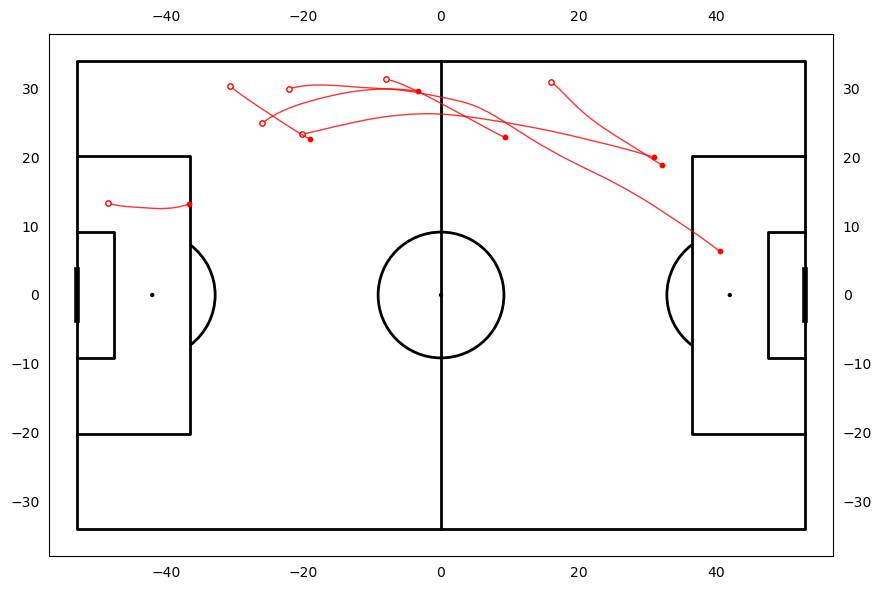

In [100]:
#Ruan
starting_RB_overlaps = find_overlapping_runs(starting_RB)
print(starting_RB_overlaps)
plot_runs(starting_RB, starting_RB_overlaps)

[(9094, 9207), (11725, 11769), (42578, 42598), (51519, 51599), (109183, 109381)]


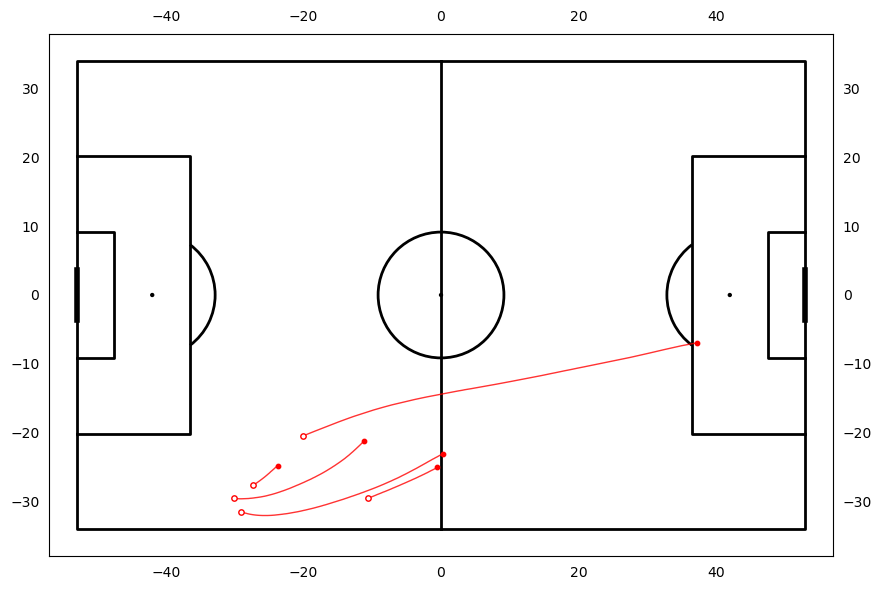

In [101]:
# Joao
starting_LB_overlaps = find_overlapping_runs(starting_LB)
print(starting_LB_overlaps)
plot_runs(starting_LB, starting_LB_overlaps)

[(117180, 117310), (141334, 141365)]


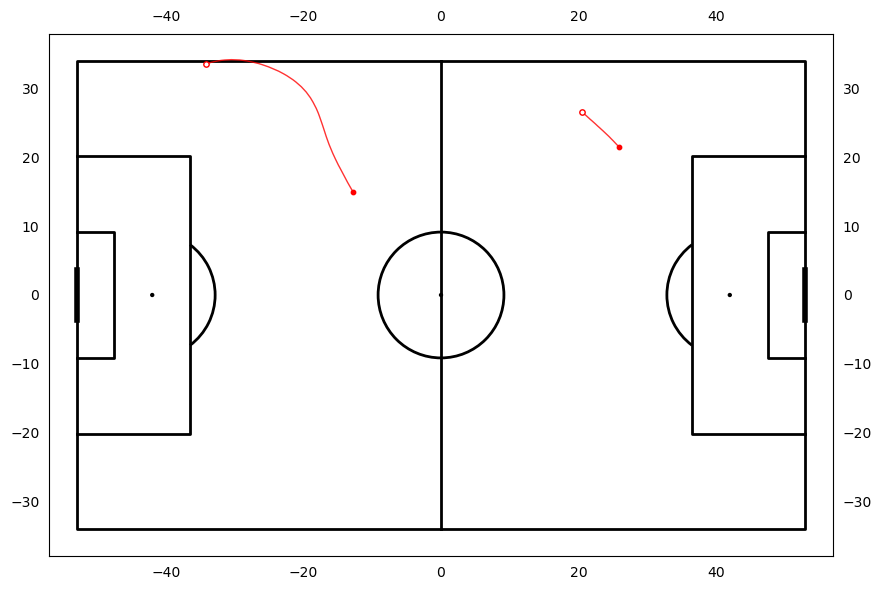

In [102]:
# Smith
sub_RB_overlaps = find_overlapping_runs(sub_RB)
print(sub_RB_overlaps)
plot_runs(sub_RB, sub_RB_overlaps)

# Scouting Report Example
Taken from Statsbomb

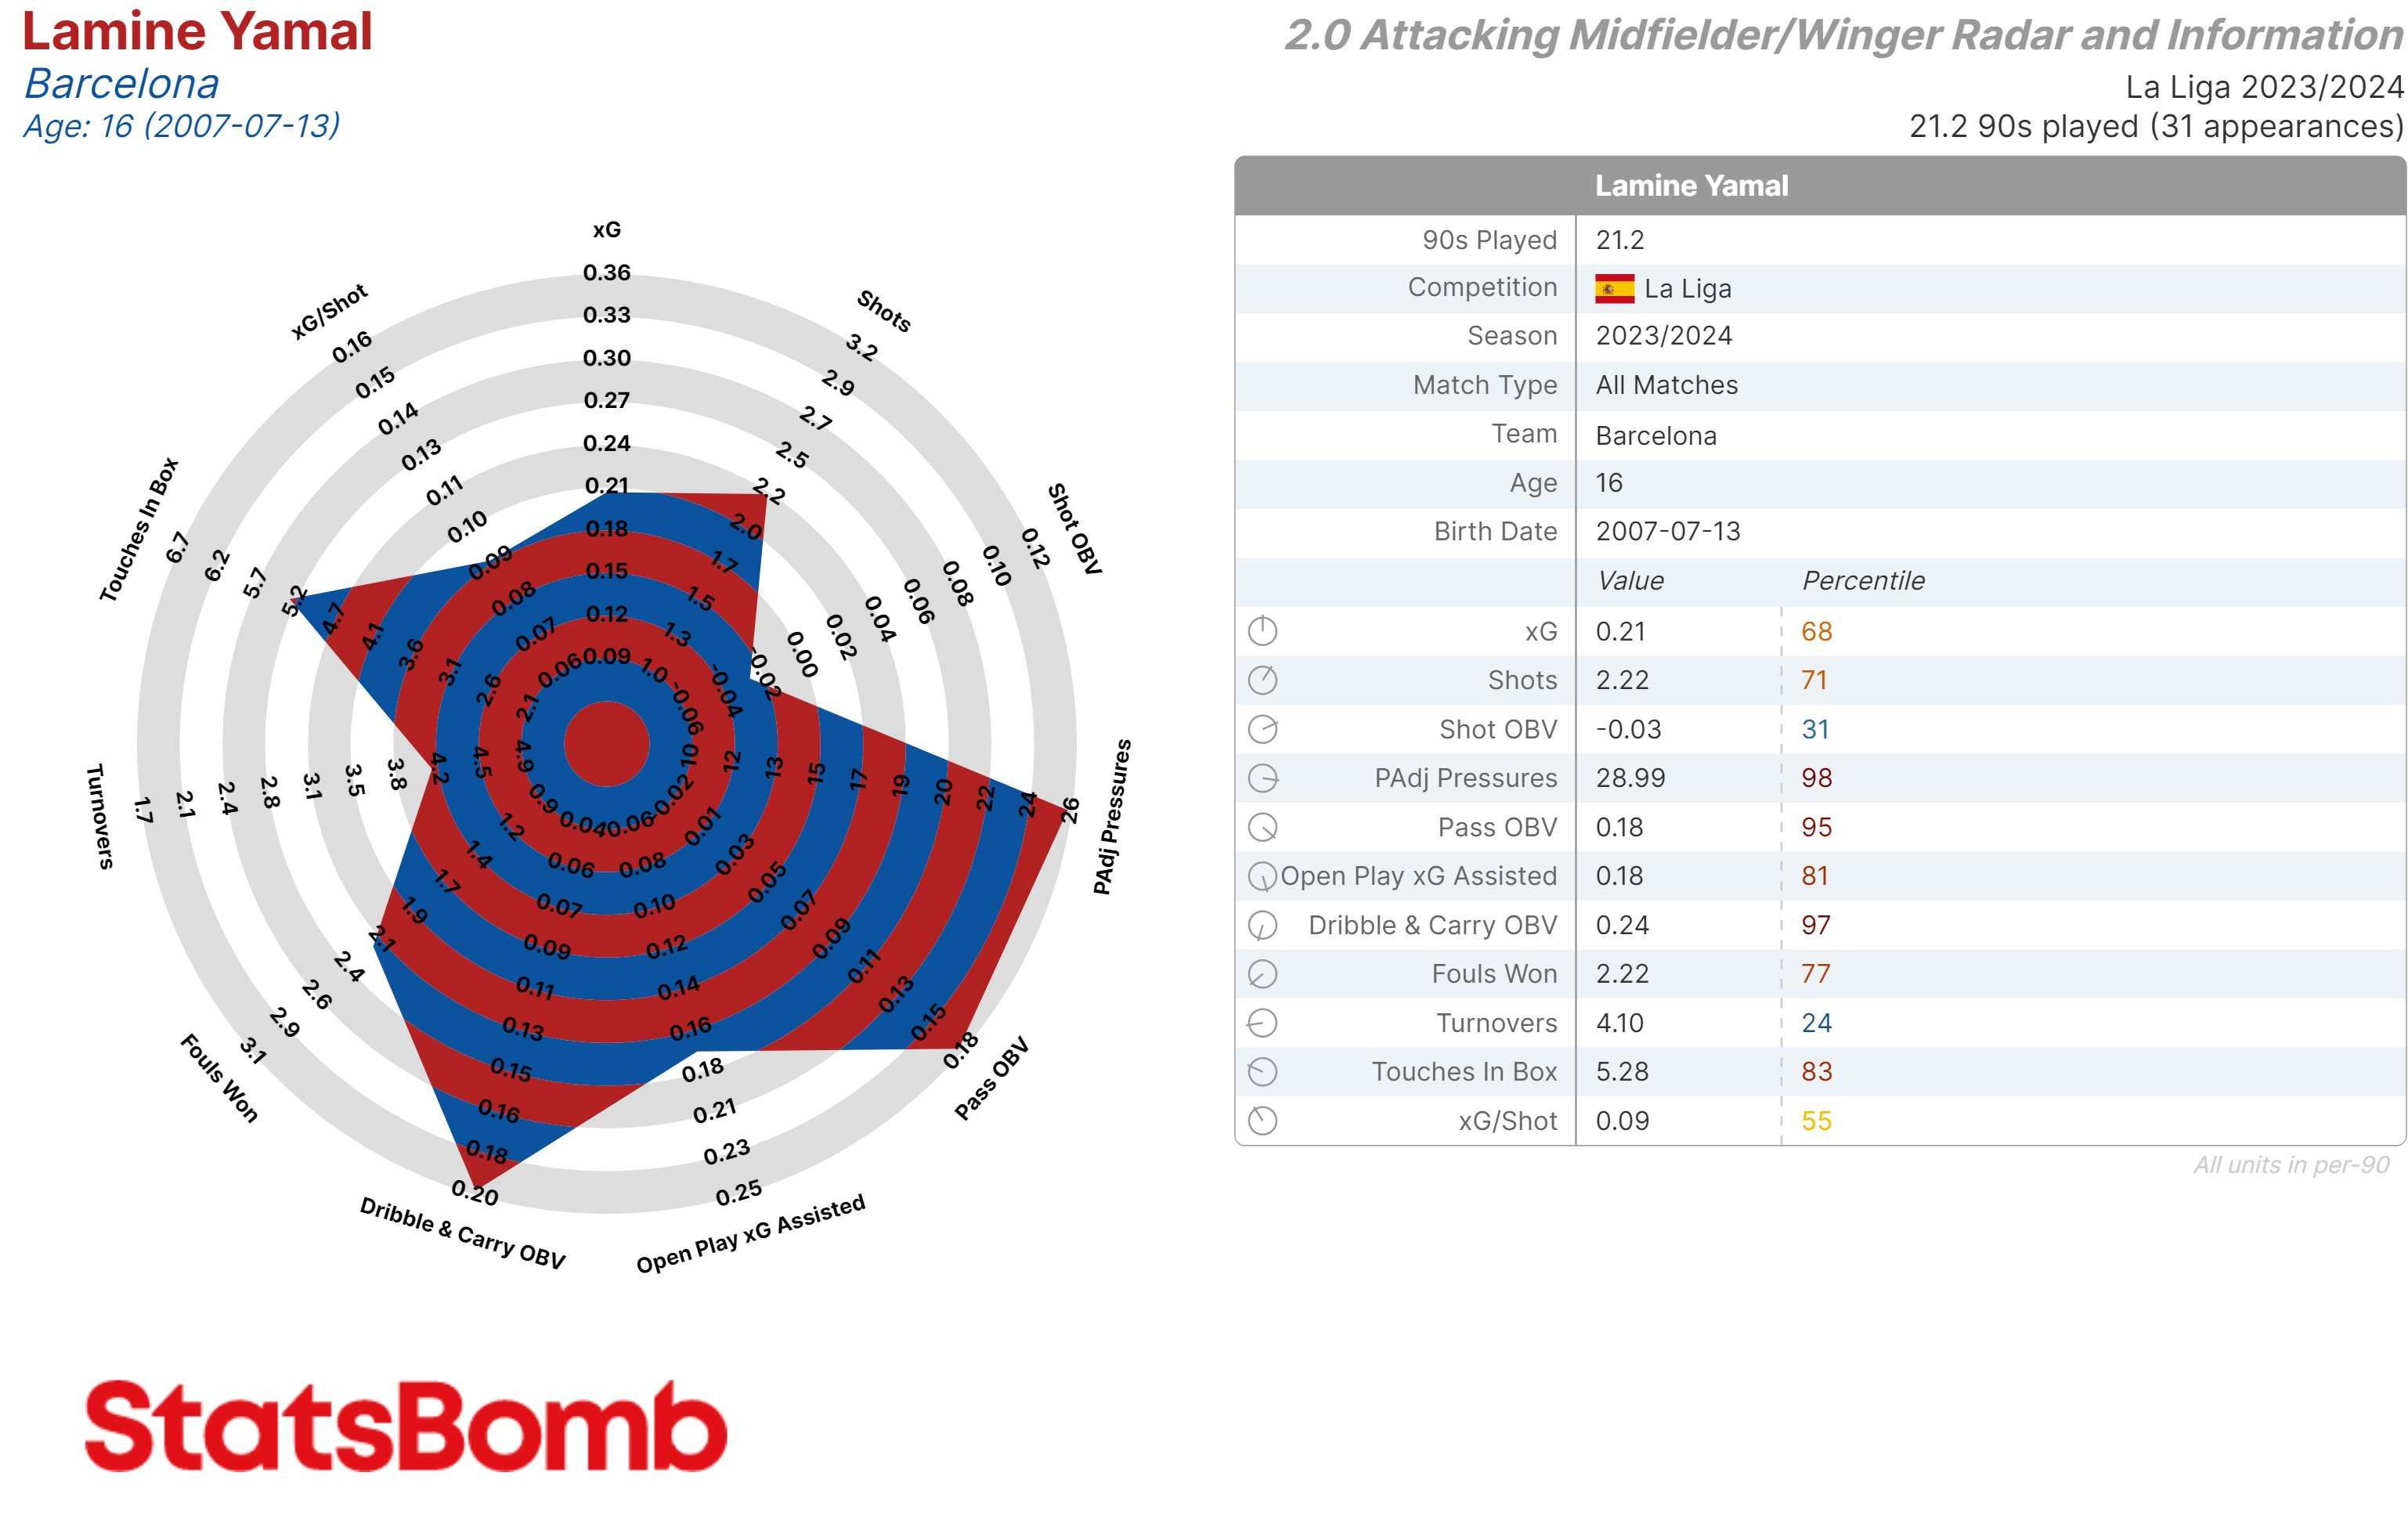